## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 100)

### Reading Data Frame

In [5]:
sw = pd.read_json('Data/atpplayers.json', lines=True)

In [68]:
sw.isna().any()

_id           False
PlayerName    False
Born          False
Height        False
Hand          False
LinkPlayer    False
Tournament    False
Location      False
Date          False
Ground        False
Prize         False
GameRound     False
GameRank      False
Oponent       False
WL            False
Score         False
dtype: bool

### Lenght of Data Frame

In [69]:
len(sw)

1308835

In [70]:
sw.head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
0,{'$oid': '624ab34913b144c54b3c9aba'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Davis Cup Finals,"Madrid, Spain",2021.11.22 - 2021.12.05,Hard,,Semi-Finals,30,Marin Cilic,W,64 62
1,{'$oid': '624ab34913b144c54b3c9abb'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Dubai,"Dubai, U.A.E.",2022.02.21 - 2022.02.26,Hard,"$2,794,840",Round of 16,26,Karen Khachanov,W,63 76
2,{'$oid': '624ab34913b144c54b3c9abc'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Nitto ATP Finals,"Turin, Italy",2021.11.15 - 2021.11.21,Hard,"$7,250,000",Round Robin,12,Cameron Norrie,W,62 61
3,{'$oid': '624ab34913b144c54b3c9abd'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Nitto ATP Finals,"Turin, Italy",2021.11.15 - 2021.11.21,Hard,"$7,250,000",Round Robin,5,Andrey Rublev,W,63 62
4,{'$oid': '624ab34913b144c54b3c9abe'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Paris,"Paris, France",2021.11.01 - 2021.11.07,Hard,"�5,207,405",Finals,2,Daniil Medvedev,W,46 63 63


### Selecting Only Switzerland

In [71]:
switzerland_sw = sw[sw['Location'].str.contains('Switzerland', case=False)]

In [72]:
switzerland_sw.head(3)

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
769,{'$oid': '624ab34913b144c54b3c9dbb'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Semi-Finals,32,Kei Nishikori,L,"62 67, 06"
770,{'$oid': '624ab34913b144c54b3c9dbc'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Quarter-Finals,59,Marcos Baghdatis,W,26 62 63
771,{'$oid': '624ab34913b144c54b3c9dbd'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 16,64,Lukasz Kubot,W,61 62


### Fix Id 

In [73]:
switzerland_sw._id = switzerland_sw._id.apply(lambda x: str(x).split(":")[1].split("'")[1].split("'")[0])

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/222526879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw._id = switzerland_sw._id.apply(lambda x: str(x).split(":")[1].split("'")[1].split("'")[0])


In [74]:
switzerland_sw.drop("_id", inplace=True, axis=1)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3554660807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop("_id", inplace=True, axis=1)


We do not need the id sinnce we gonna drop it 

### Length with data frame with only switzerland

In [75]:
len(switzerland_sw)

14828

### Limpar Born
Como não faz sentido usar o local de nascimento da pessoa para prever o numero de sets então vamos eliminar essa feature

In [76]:
switzerland_sw.drop("Born", axis=1, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/1521346280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop("Born", axis=1, inplace=True)


In [77]:
switzerland_sw.head(3)

,PlayerName,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
769,Novak Djokovic,188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Semi-Finals,32,Kei Nishikori,L,"62 67, 06"
770,Novak Djokovic,188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Quarter-Finals,59,Marcos Baghdatis,W,26 62 63
771,Novak Djokovic,188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,"�1,308,100",Round of 16,64,Lukasz Kubot,W,61 62


### Drop the link of the player that we're not going to use

In [78]:
switzerland_sw.drop("LinkPlayer", axis=1, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2712100004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop("LinkPlayer", axis=1, inplace=True)


### Limpar Altura
Preenchend pela média

In [79]:
len(switzerland_sw[switzerland_sw["Height"] == "NA"])

2059

In [80]:
index_to_fill = switzerland_sw[switzerland_sw["Height"] == "NA"]["Height"].index
mean_of_height = round(switzerland_sw[switzerland_sw["Height"] != "NA"]["Height"].astype(int).mean(),0)
switzerland_sw["Height"].loc[index_to_fill] = mean_of_height

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3192420451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["Height"].loc[index_to_fill] = mean_of_height


In [81]:
switzerland_sw['Height'] = switzerland_sw['Height'].astype(int)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2767271817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Height'] = switzerland_sw['Height'].astype(int)


### Limpar Mão 

In [82]:
len(switzerland_sw[switzerland_sw["Hand"] == "null"]["PlayerName"].unique())

274

Existem 274 jogadores que não têm a sua mão preferida de jogo. Como faltam esses dados para muitos jogadore não vamos utilizar e caso no futuro queiramos utilizar essa variável para saber sua utilidade temos que falar com a equipe de data engineers para coletarem esses dados de forma fiavel e armazenar na base de dados

In [83]:
switzerland_sw[switzerland_sw["Hand"] == "null"].head(3)


,PlayerName,Height,Hand,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
247524,Juan Sebastian Gomez,184,null,Switzerland F2,Switzerland,2014.03.24 - 2014.03.30,Carpet,"$15,000",Round of 16,236,Henri Laaksonen,L,36 26
247525,Juan Sebastian Gomez,184,null,Switzerland F2,Switzerland,2014.03.24 - 2014.03.30,Carpet,"$15,000",Round of 32,859,Pirmin Haenle,W,06 62 64
247526,Juan Sebastian Gomez,184,null,Switzerland F1,Switzerland,2014.03.17 - 2014.03.23,Carpet,"$15,000",Round of 32,756,Frederik Nielsen,L,57 57


In [84]:
switzerland_sw.drop("Hand", axis=1, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2744573493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop("Hand", axis=1, inplace=True)


### Verificar coluna tournament

In [85]:
switzerland_sw.Tournament.value_counts()

Geneva                            2911
Gstaad                            2747
Basel                             2599
Lugano                             975
Switzerland F2                     856
                                  ... 
G1 SUI vs LIB Round 1                6
SUI vs. CZE 1st Rd.                  6
ISR V SUI ZBF                        4
TCH V SUI 1RD                        2
SUI vs. ESP - EUROPE ZONE A QF       1
Name: Tournament, Length: 67, dtype: int64

### Verificar Coluna Location

In [86]:
switzerland_sw.Location.value_counts()

Geneva, Switzerland                 3013
Gstaad, Switzerland                 2747
Basel, Switzerland                  2604
Switzerland                         2394
Lugano, Switzerland                  975
Bossonnens, Switzerland              281
Biel, Switzerland                    278
Trimbach, Switzerland                239
Chiasso, Switzerland                 239
Oberentfelden, Switzerland           236
Sion, Switzerland                    230
Nyon, Switzerland                    164
Klosters, Switzerland                123
Wilen, Switzerland                   122
Neuchatel, Switzerland               121
Caslano, Switzerland                 120
Bellevue, Switzerland                118
Collonge-Bellerive, Switzerland      117
Schlieren, Switzerland               114
Rumikon, Switzerland                  95
Taverne, Switzerland                  62
Leuggern, Switzerland                 62
Muttenz, Switzerland                  59
Lausanne, Switzerland                 58
Horgen, Switzerl

### Game Round

In [87]:
switzerland_sw["GameRound"].value_counts()

Round of 32             6511
Round of 16             3348
Quarter-Finals          1699
1st Round Qualifying     962
Semi-Finals              864
2nd Round Qualifying     541
Finals                   434
Round Robin              295
3rd Round Qualifying     173
Round of 64                1
Name: GameRound, dtype: int64

In [88]:
switzerland_sw["GameRound"].isna().any()

False

### Checking Ground

In [89]:
switzerland_sw["Ground"].value_counts()

Clay      8519
Hard      3320
Carpet    2989
Name: Ground, dtype: int64

In [90]:
switzerland_sw["Ground"].isna().any()

False

### Cleanning � and turning Prize into numeric

In [91]:
switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'�'],value='')
switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'$'],value='')
switzerland_sw['Prize'] = switzerland_sw['Prize'].str.replace('$', '')
switzerland_sw['Prize'] = switzerland_sw['Prize'].str.replace(',', '')

switzerland_sw.head(2)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3314465472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'�'],value='')
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3314465472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Prize'] = switzerland_sw['Prize'].replace(regex=[r'$'],value='')
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3314465472.py:3: FutureWarning: 

,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
769,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100,Semi-Finals,32,Kei Nishikori,L,"62 67, 06"
770,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100,Quarter-Finals,59,Marcos Baghdatis,W,26 62 63


In [92]:
switzerland_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14828 entries, 769 to 1308685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlayerName  14828 non-null  object
 1   Height      14828 non-null  int64 
 2   Tournament  14828 non-null  object
 3   Location    14828 non-null  object
 4   Date        14828 non-null  object
 5   Ground      14828 non-null  object
 6   Prize       14828 non-null  object
 7   GameRound   14828 non-null  object
 8   GameRank    14828 non-null  object
 9   Oponent     14828 non-null  object
 10  WL          14828 non-null  object
 11  Score       14828 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


In [144]:
switzerland_sw[["Prize", "GameRound"]]

,Prize,GameRound
769,1308100.0,Semi-Finals
770,1308100.0,Quarter-Finals
771,1308100.0,Round of 16
772,1308100.0,Round of 32
858,1225000.0,Finals
...,...,...
1305459,25000.0,Round of 16
1305472,25000.0,Round of 32
1306059,25000.0,Round of 32
1308683,30000.0,2nd Round Qualifying


In [93]:
len(switzerland_sw[switzerland_sw['Prize'] == ""])

295

#### Cleanning Empty Strings on Prize and replacing by the mean since is only 295 missing

In [94]:
index_to_fill = switzerland_sw[switzerland_sw['Prize'] == ""].index
mean_prize = np.round(np.mean(switzerland_sw[switzerland_sw['Prize']!=""]['Prize'].astype(float)), 0)
switzerland_sw["Prize"].loc[index_to_fill] = mean_prize

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/4101708354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["Prize"].loc[index_to_fill] = mean_prize


In [95]:
len(switzerland_sw[switzerland_sw['Prize'] == ""])

0

In [96]:
switzerland_sw['Prize'] = switzerland_sw['Prize'].astype(float)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3601817039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Prize'] = switzerland_sw['Prize'].astype(float)


### Cheking Variable Score

In [97]:
switzerland_sw[switzerland_sw["Score"] == 'null'].head(3)

,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
3669,Alexander Zverev,198,Geneva,"Geneva, Switzerland",2019.05.20 - 2019.05.25,Clay,524340.0,Round of 32,,bye,,null
5376,Andrey Rublev,188,Gstaad,"Gstaad, Switzerland",2018.07.23 - 2018.07.29,Clay,501345.0,Round of 32,,bye,,null
5727,Casper Ruud,183,Gstaad,"Gstaad, Switzerland",2021.07.19 - 2021.07.25,Clay,419470.0,Round of 32,,bye,,null


Quandoo score é null podemos ver que que o nome do oponente é bye, provavelmente significa que não apareceu, logo nem sequer fazer sentido manter esses casos, vamos fazer o drop desses indices que são apenas 148 casos

In [98]:
indices_to_drop = switzerland_sw[switzerland_sw["Score"] == 'null'].index
switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3207800736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)


In [99]:
len(switzerland_sw[switzerland_sw["Score"] == 'null'])

0

### Create Score_1

### Creating a new column from score to count the number of sets later on

In [100]:
def retirar_espacos_virgulas(score):
    return score.replace(' ', '').replace(',', '').replace('-','')

# aplicar a função à coluna 'Score' e criar uma nova coluna 'Score_sem_espacos_virgulas'
switzerland_sw['Score_1'] = switzerland_sw['Score'].apply(retirar_espacos_virgulas)

switzerland_sw.head(3)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/64697154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Score_1'] = switzerland_sw['Score'].apply(retirar_espacos_virgulas)


,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1
769,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706
770,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263
771,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Round of 16,64,Lukasz Kubot,W,61 62,6162


In [101]:
switzerland_sw[switzerland_sw["Score"] == 'null'].head(3)

,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1


### Counting the number of sets depending on the len on the previous feature created

In [102]:
def contar_sets(score_1):
    num_digitos = len(score_1)
    resultado = score_1
    if '(RET)' in score_1:

        ret_pos = score_1.find('(RET)')
        num_digitos = sum(c.isdigit() for c in score_1[:ret_pos])
        
    else:
        num_digitos = sum(c.isdigit() for c in score_1)

    if num_digitos == 10:
        return 5
    elif num_digitos == 8:
        return 4
    elif num_digitos == 6:
        return 3
    elif num_digitos == 4:
        return 2
    elif num_digitos == 2:
        return 1
    elif resultado == '(W/O)':
        return 0
    else:
        return None

switzerland_sw['Numero_sets'] = switzerland_sw['Score_1'].apply(contar_sets)

switzerland_sw.head(3)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3010822382.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Numero_sets'] = switzerland_sw['Score_1'].apply(contar_sets)


,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets
769,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706,3.0
770,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263,3.0
771,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Round of 16,64,Lukasz Kubot,W,61 62,6162,2.0


### Cheking (Ret)

In [103]:
(switzerland_sw['Score'].str.contains('(RET)').sum() / len(switzerland_sw)) *100

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3648962039.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (switzerland_sw['Score'].str.contains('(RET)').sum() / len(switzerland_sw)) *100


2.4250681198910082

Dropping Score and Score_1 column that was used to create our target variable and we are not going to use those variables anymore

In [104]:
switzerland_sw[switzerland_sw['Score'].str.contains('(RET)')].head(3)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/641300440.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  switzerland_sw[switzerland_sw['Score'].str.contains('(RET)')].head(3)


,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets
9991,Roberto Bautista Agut,183,Gstaad,"Gstaad, Switzerland",2013.07.22 - 2013.07.28,Clay,410200.0,Round of 16,54,Victor Hanescu,L,"67, 23 (RET)",6723(RET),2.0
10054,Roberto Bautista Agut,183,Gstaad,"Gstaad, Switzerland",2012.07.16 - 2012.07.22,Clay,358425.0,2nd Round Qualifying,245,Martin Fischer,L,16 01 (RET),1601(RET),2.0
14133,Marin Cilic,198,Basel,"Basel, Switzerland",2017.10.23 - 2017.10.29,Hard,1837425.0,Round of 32,68,Florian Mayer,W,63 (RET),63(RET),1.0


In [105]:
index_to_drop = switzerland_sw[switzerland_sw['Score'].str.contains('(RET)')].index
switzerland_sw.drop(index_to_drop, axis=0, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/4121727408.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  index_to_drop = switzerland_sw[switzerland_sw['Score'].str.contains('(RET)')].index
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/4121727408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index_to_drop, axis=0, inplace=True)


### Checking (W/O)

In [106]:
(switzerland_sw['Score'].str.contains('(W/O)').sum() / len(switzerland_sw)) *100

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2896742122.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (switzerland_sw['Score'].str.contains('(W/O)').sum() / len(switzerland_sw)) *100


0.46076514939960905

In [107]:
index_to_drop = switzerland_sw[switzerland_sw['Score'].str.contains('(W/O)')].index
switzerland_sw.drop(index_to_drop, axis=0, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2472146490.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  index_to_drop = switzerland_sw[switzerland_sw['Score'].str.contains('(W/O)')].index
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2472146490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index_to_drop, axis=0, inplace=True)


### Checking the number of rows of the new feature is na

In [108]:
switzerland_sw['Numero_sets'].isna().sum()

10

### Dropping rows

In [109]:
switzerland_sw.dropna(subset=['Numero_sets'], inplace=True, axis=0)
switzerland_sw['Numero_sets'].isna().sum()

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2258402279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.dropna(subset=['Numero_sets'], inplace=True, axis=0)


0

### Passing Game Rank to Integer

The Players that do not have a rank, are players that has a high rank, so we going to do a convenction that players that does not have a rank are in 1001 position

In [110]:
index_to_fill = switzerland_sw[switzerland_sw['GameRank'] == "-"].index
switzerland_sw["GameRank"].loc[index_to_fill] = "1001"

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/1262623244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["GameRank"].loc[index_to_fill] = "1001"


In [111]:
switzerland_sw["GameRank"] = switzerland_sw["GameRank"].astype(int)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3464275836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["GameRank"] = switzerland_sw["GameRank"].astype(int)


In [112]:
switzerland_sw["GameRank"].max()

2238

### Creating new feature to be a possible target 

In [113]:
def num_of_points(Score_1):
    total_points = 0
    for i in range(len(Score_1)):
        total_points += int(Score_1[i])
    return total_points

In [114]:
switzerland_sw["TotalPoints"] = switzerland_sw["Score_1"].apply(num_of_points)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/941572558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["TotalPoints"] = switzerland_sw["Score_1"].apply(num_of_points)


In [115]:
switzerland_sw.head(3)

,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,Score_1,Numero_sets,TotalPoints
769,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Semi-Finals,32,Kei Nishikori,L,"62 67, 06",626706,3.0,27
770,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Quarter-Finals,59,Marcos Baghdatis,W,26 62 63,266263,3.0,25
771,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Round of 16,64,Lukasz Kubot,W,61 62,6162,2.0,15


In [116]:
switzerland_sw.drop(["Score", "Score_1"], axis=1, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/1171537445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(["Score", "Score_1"], axis=1, inplace=True)


In [117]:
switzerland_sw.head(3)

,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Numero_sets,TotalPoints
769,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Semi-Finals,32,Kei Nishikori,L,3.0,27
770,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Quarter-Finals,59,Marcos Baghdatis,W,3.0,25
771,Novak Djokovic,188,Basel,"Basel, Switzerland",2011.10.31 - 2011.11.06,Hard,1308100.0,Round of 16,64,Lukasz Kubot,W,2.0,15


### Converting number of setting to integer

In [118]:
switzerland_sw['Numero_sets'] = switzerland_sw['Numero_sets'].astype(int)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/2617070812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw['Numero_sets'] = switzerland_sw['Numero_sets'].astype(int)


### Creating date columns and calculating the lenght of the tournament in days

In [119]:
switzerland_sw[~switzerland_sw['Date'].str.contains('-', case=False)].head()

,PlayerName,Height,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Numero_sets,TotalPoints
1029287,John James,183,Geneva,"Geneva, Switzerland",1980.09.22,Clay,75000.0,Round of 32,1001,Greg Whitecross,W,2,17
1029288,John James,183,Geneva,"Geneva, Switzerland",1980.09.22,Clay,75000.0,Round of 16,25,Balazs Taroczy,L,2,16
1111582,Stefan Edberg,188,Basel,"Basel, Switzerland",1983.10.10,Hard,100000.0,Round of 16,27,Wojtek Fibak,L,2,22
1111583,Stefan Edberg,188,Basel,"Basel, Switzerland",1983.10.10,Hard,100000.0,Round of 32,1001,Erick Iskersky,W,2,16
1111595,Stefan Edberg,188,Geneva,"Geneva, Switzerland",1982.09.20,Clay,75000.0,Round of 32,1001,Jairo Velasco Sr,L,3,23


In [120]:
len(switzerland_sw[~switzerland_sw['Date'].str.contains('-', case=False)])/len(switzerland_sw) *100

1.4458169567658619

Podemos ver que os casos em que não temos a data do termino da partida são de torneis datados dos anos oitento que já são dados ultrapassados e que correspondem a apenas 1.4% dos dados

In [121]:
indices_to_drop = switzerland_sw[~switzerland_sw['Date'].str.contains('-', case=False)].index

switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/1991746986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop(index=indices_to_drop, axis=0, inplace=True)


In [122]:
switzerland_sw["start_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[0])
switzerland_sw["end_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[1])

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/407940070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["start_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[0])
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/407940070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["end_date"] = switzerland_sw["Date"].apply(lambda x: x.split("-")[1])


In [123]:
switzerland_sw["start_date"] = pd.to_datetime(switzerland_sw["start_date"])
switzerland_sw["end_date"] = pd.to_datetime(switzerland_sw["end_date"])

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/68302794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["start_date"] = pd.to_datetime(switzerland_sw["start_date"])
/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/68302794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["end_date"] = pd.to_datetime(switzerland_sw["end_date"])


In [124]:
switzerland_sw["tornament_days"] = (switzerland_sw["end_date"] - switzerland_sw["start_date"]).dt.days

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/4038897034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw["tornament_days"] = (switzerland_sw["end_date"] - switzerland_sw["start_date"]).dt.days


#### Dropping the Date Column that we not going to use anymore 

In [125]:
switzerland_sw.drop("Date", inplace=True, axis=1)
switzerland_sw.head(3)

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/1447497294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw.drop("Date", inplace=True, axis=1)


,PlayerName,Height,Tournament,Location,Ground,Prize,GameRound,GameRank,Oponent,WL,Numero_sets,TotalPoints,start_date,end_date,tornament_days
769,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Semi-Finals,32,Kei Nishikori,L,3,27,2011-10-31,2011-11-06,6
770,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Quarter-Finals,59,Marcos Baghdatis,W,3,25,2011-10-31,2011-11-06,6
771,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 16,64,Lukasz Kubot,W,2,15,2011-10-31,2011-11-06,6


### Extract the city

In [126]:
switzerland_sw["Location"].value_counts()

Geneva, Switzerland                 2811
Gstaad, Switzerland                 2555
Basel, Switzerland                  2466
Switzerland                         2278
Lugano, Switzerland                  931
Bossonnens, Switzerland              277
Biel, Switzerland                    268
Oberentfelden, Switzerland           233
Trimbach, Switzerland                228
Sion, Switzerland                    226
Chiasso, Switzerland                 223
Nyon, Switzerland                    162
Neuchatel, Switzerland               121
Wilen, Switzerland                   120
Klosters, Switzerland                117
Caslano, Switzerland                 116
Collonge-Bellerive, Switzerland      116
Schlieren, Switzerland               114
Bellevue, Switzerland                112
Rumikon, Switzerland                  95
Taverne, Switzerland                  60
Leuggern, Switzerland                 60
Lausanne, Switzerland                 58
Sierre, Switzerland                   57
Muttenz, Switzer

- Select after a year, like old data might be outdated
- Create id to unique matches 

### See the distribution on the Date

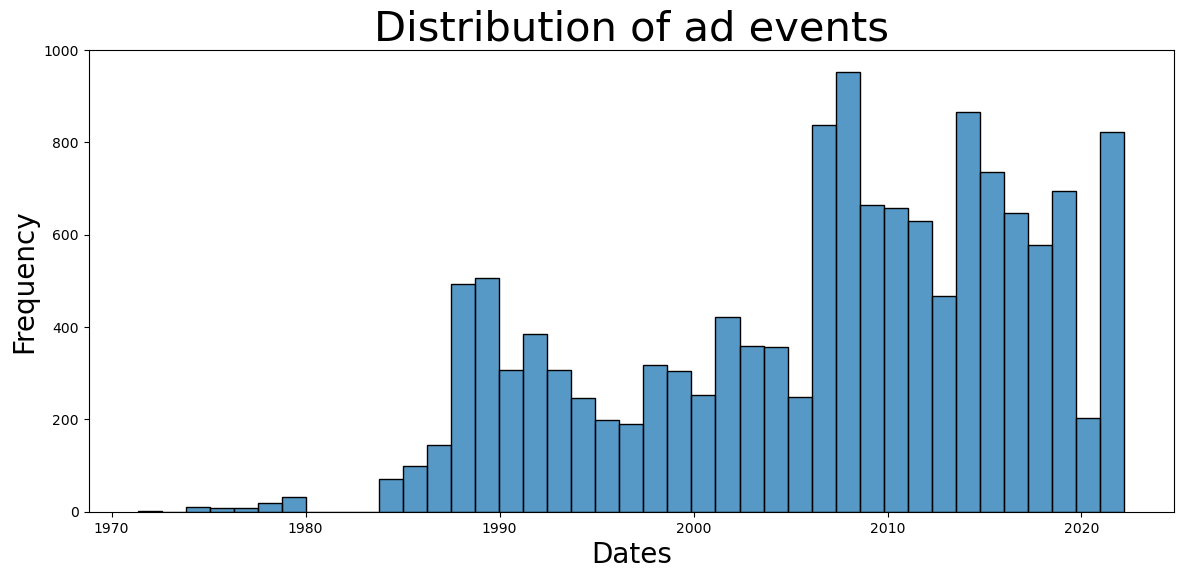

In [127]:
z = switzerland_sw["start_date"]
plt.figure(figsize=(14,6))
sns.histplot(z)
plt.title("Distribution of ad events", size=30)
plt.ylabel("Frequency", size=20)
plt.xlabel("Dates", size=20);

### Selecting Variables After the year 2000 to have update date

In [145]:
switzerland_sw = switzerland_sw[switzerland_sw["start_date"].dt.year >2000] 

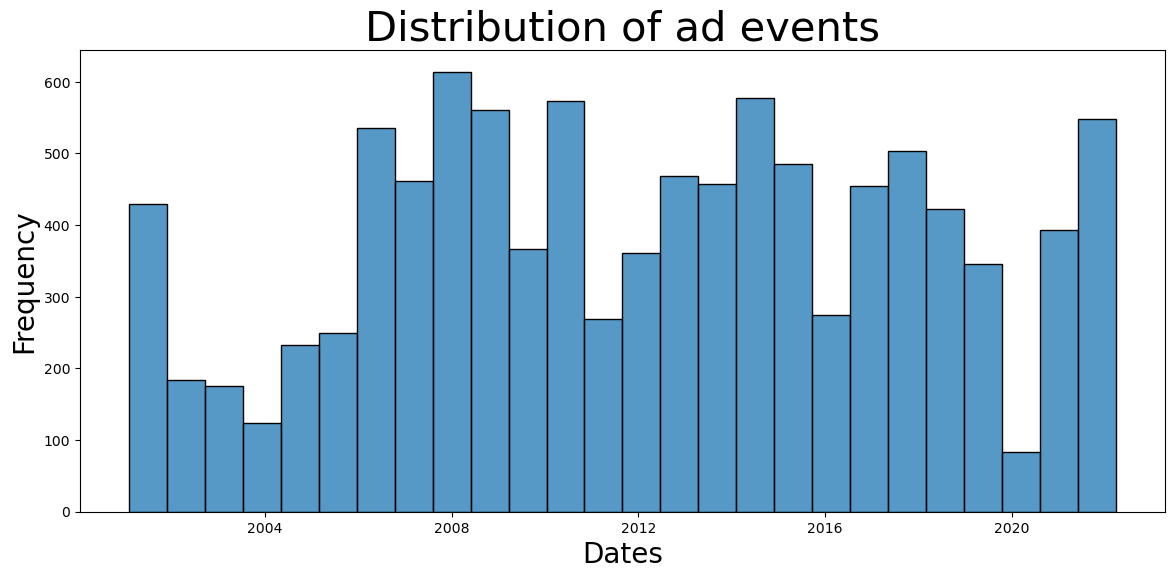

In [146]:
z = switzerland_sw["start_date"]
plt.figure(figsize=(14,6))
sns.histplot(z)
plt.title("Distribution of ad events", size=30)
plt.ylabel("Frequency", size=20)
plt.xlabel("Dates", size=20);

### Joining the Winner and the loser in the same row

#### Separate Data Frame in Winner and Loser

In [147]:
switzerland_sw_winner = switzerland_sw[switzerland_sw['WL'] == 'W']
switzerland_sw_losser = switzerland_sw[switzerland_sw['WL'] == 'L']

### To create the unique id:
- In the winner data set and loser data set we grab the information that in common in the game like:
    - 'Tournament'
    - 'Location', 
    - 'Ground', 
    - 'Prize', 
    - 'GameRound'
    - 'Numero_sets', 
    - 'TotalPoints'
    - start_date', 
    - 'end_date'
- Then in the winner dataset we add 
    - Player Name 
    - Opponent 
- Then in the loser dataset we add 
    - Opponent 
    - Player

Doing this we make sure that the both id for winner and loser will be the same. We select the most information that we can to make sure that the two different games cant have the same id

In [148]:
switzerland_sw.columns

Index(['PlayerName', 'Height', 'Tournament', 'Location', 'Ground', 'Prize',
       'GameRound', 'GameRank', 'Oponent', 'WL', 'Numero_sets', 'TotalPoints',
       'start_date', 'end_date', 'tornament_days'],
      dtype='object')

In [149]:
switzerland_sw_winner['GameId'] = switzerland_sw_winner['Tournament'] + '_' + switzerland_sw_winner['Location'] + '_' + switzerland_sw_winner['Ground'] + '_' + \
               switzerland_sw_winner['Prize'].astype(str) + '_' + switzerland_sw_winner['GameRound'] + '_' + switzerland_sw_winner['Numero_sets'].astype(str) + \
               '_' + switzerland_sw_winner['tornament_days'].astype(str) + '_' + switzerland_sw_winner['start_date'].astype(str) + '_' + switzerland_sw_winner['PlayerName']  + '_' + switzerland_sw_winner['Oponent']

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3346067308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw_winner['GameId'] = switzerland_sw_winner['Tournament'] + '_' + switzerland_sw_winner['Location'] + '_' + switzerland_sw_winner['Ground'] + '_' + \


In [150]:
switzerland_sw_losser['GameId'] = switzerland_sw_losser['Tournament'] + '_' + switzerland_sw_losser['Location'] + '_' + switzerland_sw_losser['Ground'] + '_' + \
               switzerland_sw_losser['Prize'].astype(str) + '_' + switzerland_sw_losser['GameRound'] + '_' + switzerland_sw_losser['Numero_sets'].astype(str) + \
               '_' + switzerland_sw_losser['tornament_days'].astype(str) + '_' + switzerland_sw_losser['start_date'].astype(str) +'_' + switzerland_sw_losser['Oponent'] + '_' + switzerland_sw_losser['PlayerName']

/var/folders/by/h2v0ff9j4mvgbk5y8d7h456r0000gq/T/ipykernel_7782/3136250086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switzerland_sw_losser['GameId'] = switzerland_sw_losser['Tournament'] + '_' + switzerland_sw_losser['Location'] + '_' + switzerland_sw_losser['Ground'] + '_' + \


In [134]:
switzerland_sw_losser[switzerland_sw_losser["GameId"] == switzerland_sw_winner["GameId"].iloc[3]]

,PlayerName,Height,Tournament,Location,Ground,Prize,GameRound,GameRank,Oponent,WL,Numero_sets,TotalPoints,start_date,end_date,tornament_days,GameId
139760,Viktor Troicki,193,Basel,"Basel, Switzerland",Hard,1225000.0,Semi-Finals,3,Novak Djokovic,L,2,23,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Semi-F..."


In [153]:
player_1 = ['PlayerName', 'Height','Tournament', 'Location', 'Ground', 'Prize', 'GameRound','GameRank', 'Numero_sets',
       'TotalPoints', 'start_date', 'end_date', 'tornament_days','GameId']
player_2 = ['PlayerName', 'Height','GameRank','GameId']
switzerland_f = pd.merge(switzerland_sw_winner[player_1], switzerland_sw_losser[player_2], on='GameId', how='inner')

In [155]:
reanme_columns_name = ["Player1_Name", "Player1_Height", "Tournament", "Location", "Ground", "Prize", "GameRound", "Player2_Rank", "Num_Sets", "TotalPoints", "Start_Date", "End_Date", "Tornament_Days", "GameId", "Player2_Name", "Player2_Height", "Player1_Rank"] 
switzerland_f.columns = reanme_columns_name

### Creating new column rank diff to calculate the difference between the rank of the two players

In [156]:
switzerland_f["Rank_Diff"] = abs(switzerland_f["Player1_Rank"] - switzerland_f["Player2_Rank"])

In [158]:
switzerland_f.head()

,Player1_Name,Player1_Height,Tournament,Location,Ground,Prize,GameRound,Player2_Rank,Num_Sets,TotalPoints,Start_Date,End_Date,Tornament_Days,GameId,Player2_Name,Player2_Height,Player1_Rank,Rank_Diff
0,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 16,64,2,15,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Lukasz Kubot,191,1,63
1,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 32,47,3,30,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Xavier Malisse,185,1,46
2,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Semi-Finals,32,2,23,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Semi-F...",Viktor Troicki,193,3,29
3,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Quarter-Finals,66,2,17,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Quarte...",Robin Haase,191,3,63
4,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Round of 32,26,2,18,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Round ...",Ernests Gulbis,191,3,23


In [163]:
len(switzerland_sw)

10149

In [161]:
len(switzerland_f)

4927

In [164]:
switzerland_f.to_csv("Data/switzerland_final.csv")